In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Загрузка и подготовка данных

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/ml-2-geo_data_0.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data/ml-2-geo_data_1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data/ml-2-geo_data_2.csv')

In [ ]:
df1.duplicated().sum(), df1.isna().sum()

(0, id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df2.duplicated().sum(), df2.isna().sum()

(0, id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df3.duplicated().sum(), df3.isna().sum()

(0, id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Пропусков и дубликатов нет, можно работать дальше.

## Обучение и проверка модели

In [ ]:
def predict(data):
    features = data.drop(['id','product'], axis = 1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features,target, test_size = 0.25,
                                                                                 random_state = 4)
    print('features_train size: {}'.format(len(features_train)),
          'features_valid_size: {}'.format(len(features_valid)),
          'target_train_size: {}'.format(len(target_train)),
          'target_valid_size: {}'.format(len(target_valid)),
          sep='\n')
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = pd.Series(model.predict(features_valid), index = features_valid.index)
    pred_mean = predictions.mean()
    rmse = mean_squared_error(target_valid, predictions)**0.5
    print('predictions_mean: {}'.format(pred_mean),
          'rmse: {}'.format(rmse),
          sep='\n')
    return predictions, target_valid

Функция принимает на вход данные, делит на выборки, обучает линейную регрессию, предсказывает и расчитывает среднее предсказанного и рмсе. Возвращает предсказания и целевые признаки валидационной выборки (с одинаковыми индексами).

In [ ]:
predictions1, target_valid1 = predict(df1)

features_train size: 75000
features_valid_size: 25000
target_train_size: 75000
target_valid_size: 25000
predictions_mean: 92.35919406367066
rmse: 37.71461896460248


Для первого региона получаю:
- среднее предсказанных значений - 92
- рмсе - 37

In [ ]:
predictions2, target_valid2 = predict(df2)

features_train size: 75000
features_valid_size: 25000
target_train_size: 75000
target_valid_size: 25000
predictions_mean: 69.20955288485028
rmse: 0.8896938851513517


Для второго региона получаю:
- среднее предсказанных значений - 69
- рмсе - 0.8

In [ ]:
predictions3, target_valid3 = predict(df3)

features_train size: 75000
features_valid_size: 25000
target_train_size: 75000
target_valid_size: 25000
predictions_mean: 95.1384164793143
rmse: 40.00747771674605


Для третьего региона получаю:
- среднее предсказанных значений - 95
- рмсе - 40

## Подготовка к расчёту прибыли

In [ ]:
BUDGET = 10000000000
TOP = 200
INCOME = 450000
SEARCH = 500

In [ ]:
BUDGET/TOP/INCOME

111.11111111111111

Для безубыточной разработки средней скважины, она должна содержать не менее 111.11 сырья,

In [ ]:
df1['product'].mean(), df2['product'].mean(), df3['product'].mean()

(92.49999999999976, 68.82500000002561, 95.00000000000041)

при этом средняя скважина во всех трех регионах не удовлетворяет это требование.

## Расчёт прибыли и рисков 

In [ ]:
state = np.random.RandomState(4)

In [ ]:
def profit(predictions, target):
    probs_sorted = predictions.sort_values(ascending=False)
    selected = target[probs_sorted.index][:TOP]
    return (selected.sum()*INCOME - BUDGET)

Функция принимает на вход предсказания и целевые признаки валидационной выборки, сортирует целевые признаки по убыванию, выбирает соответствующие им по индексу признаки валидационной выборки, из них выбирает топ200 и рассчитывает суммарный доход с 200 скважин.

In [ ]:
values1 = []
for i in range(1000):
    target_sample = target_valid1.sample(n = SEARCH, replace = True, random_state = state)
    preds = predictions1[target_sample.index]
    values1.append(profit(preds, target_sample))
values1 = pd.Series(values1)
print('Средний доход для первого региона: {}'.format(values1.mean()))

Средний доход для первого региона: 425652495.13236594


Циклом перебираю 1000 раз по 500 семплов, рассчитывая суммарный доход с топ200 скважин.

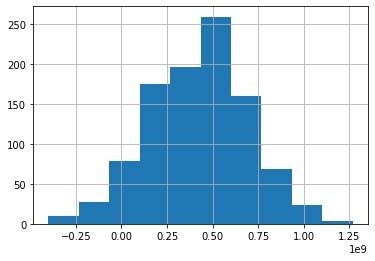

In [ ]:
values1.hist()

In [ ]:
print('Доверительный интервал 95% для первого региона: {},{}'.format(values1.quantile(0.025), values1.quantile(0.975)))

Доверительный интервал 95% для первого региона: -110487041.29623346,939237868.1743264


In [ ]:
count = 0
for i in values1:
    if i < 0:
        count += 1
print('Отношение отрицательных значений дохода к общему для первого региона: {}'.format(count / len(values1)))

Отношение отрицательных значений дохода к общему для первого региона: 0.057


In [ ]:
values2 = []
for i in range(1000):
    target_sample = target_valid2.sample(n = SEARCH, replace = True, random_state = state)
    preds = predictions2[target_sample.index]
    values2.append(profit(preds, target_sample))
values2 = pd.Series(values2)
print('Средний доход для второго региона: {}'.format(values2.mean()))

Средний доход для второго региона: 540022344.5187435


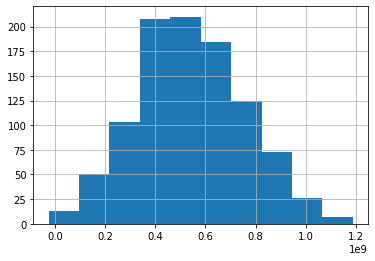

In [ ]:
values2.hist()

In [ ]:
print('Доверительный интервал 95% для второго региона: {},{}'.format(values2.quantile(0.025), values2.quantile(0.975)))

Доверительный интервал 95% для второго региона: 150950570.1990261,957158372.556443


In [ ]:
count = 0
for i in values2:
    if i < 0:
        count += 1
print('Отношение отрицательных значений дохода к общему для второго региона: {}'.format(count / len(values2)))

Отношение отрицательных значений дохода к общему для второго региона: 0.001


In [ ]:
values3 = []
for i in range(1000):
    target_sample = target_valid3.sample(n = SEARCH, replace = True, random_state = state)
    preds = predictions3[target_sample.index]
    values3.append(profit(preds, target_sample))
values3 = pd.Series(values3)
print('Средний доход для третьего региона: {}'.format(values3.mean()))

Средний доход для третьего региона: 384495114.9963092


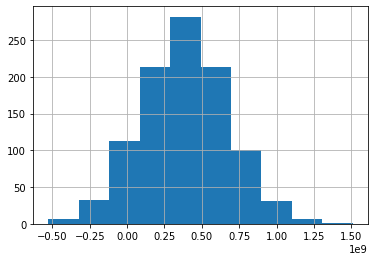

In [ ]:
values3.hist()

In [ ]:
print('Доверительный интервал 95% для третьего региона: {},{}'.format(values3.quantile(0.025), values3.quantile(0.975)))

Доверительный интервал 95% для третьего региона: -171712657.93684354,948519371.374135


In [ ]:
count = 0
for i in values3:
    if i < 0:
        count += 1
print('Отношение отрицательных значений дохода к общему для третьего региона: {}'.format(count / len(values3)))

Отношение отрицательных значений дохода к общему для третьего региона: 0.092


Для поиска и разработки скважин выбран второй регион, так как он имеет самый большой средний доход, не имеет отрицательных значений в доверительном интервале и имеет самое низкое отношение отрицательных значений дохода к общему количеству.